# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [4]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [5]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [6]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

Iteration 200 : Loss 3442.0539
Iteration 400 : Loss 3093.6647
Iteration 600 : Loss 2978.8048
Iteration 800 : Loss 2933.6121
Iteration 1000 : Loss 2914.6189
Iteration 1200 : Loss 2906.1179
Iteration 1400 : Loss 2902.0390
Iteration 1600 : Loss 2899.9229
Iteration 1800 : Loss 2898.7242
Iteration 2000 : Loss 2897.9759
Iteration 2200 : Loss 2897.4588
Iteration 2400 : Loss 2897.0654
Iteration 2600 : Loss 2896.7404
Iteration 2800 : Loss 2896.4545
Iteration 3000 : Loss 2896.1917


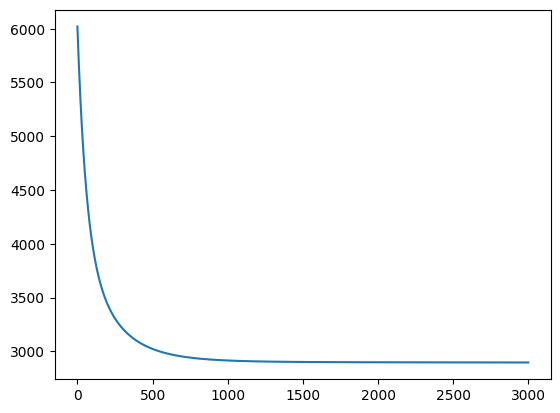

MSE: 2883.9770539094293
1.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
global W, b

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

losses = []
LEARNING_RATE = 0.5

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

# 테스트셋 평가
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("MSE:", mse)

Iteration 200: Loss 3489.4610
Iteration 400: Loss 3168.1713
Iteration 600: Loss 3069.4845
Iteration 800: Loss 3033.8899
Iteration 1000: Loss 3020.6328
Iteration 1200: Loss 3015.6022
Iteration 1400: Loss 3013.6642
Iteration 1600: Loss 3012.9080
Iteration 1800: Loss 3012.6097
Iteration 2000: Loss 3012.4909
Iteration 2200: Loss 3012.4432
Iteration 2400: Loss 3012.4239
Iteration 2600: Loss 3012.4160
Iteration 2800: Loss 3012.4127
Iteration 3000: Loss 3012.4113


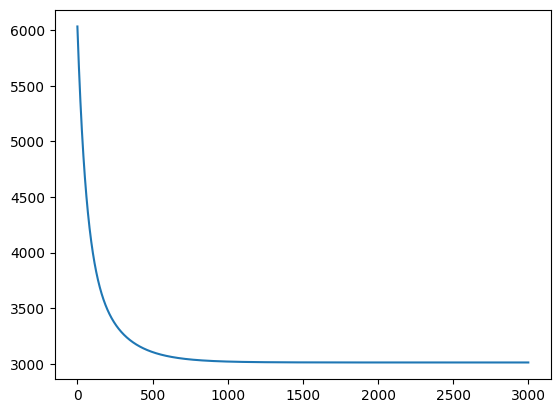

PCA 적용 후 MSE: 2864.383706464404


In [9]:
from sklearn.decomposition import PCA

# PCA로 5개 주성분으로 축소
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

global W_pca, b_pca
W_pca = np.random.rand(X_train_pca.shape[1])
b_pca = np.random.rand()

losses = []
LEARNING_RATE = 0.5

for i in range(1, 3001):
    dW, db = gradient(X_train_pca, W_pca, b_pca, y_train)
    W_pca -= LEARNING_RATE * dW
    b_pca -= LEARNING_RATE * db
    L = loss(X_train_pca, W_pca, b_pca, y_train)
    losses.append(L)
    if i % 200 == 0:
        print(f'Iteration {i}: Loss {L:.4f}')

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 테스트셋 평가
prediction = model(X_test_pca, W_pca, b_pca)
mse = loss(X_test_pca, W_pca, b_pca, y_test)
print("PCA 적용 후 MSE:", mse)

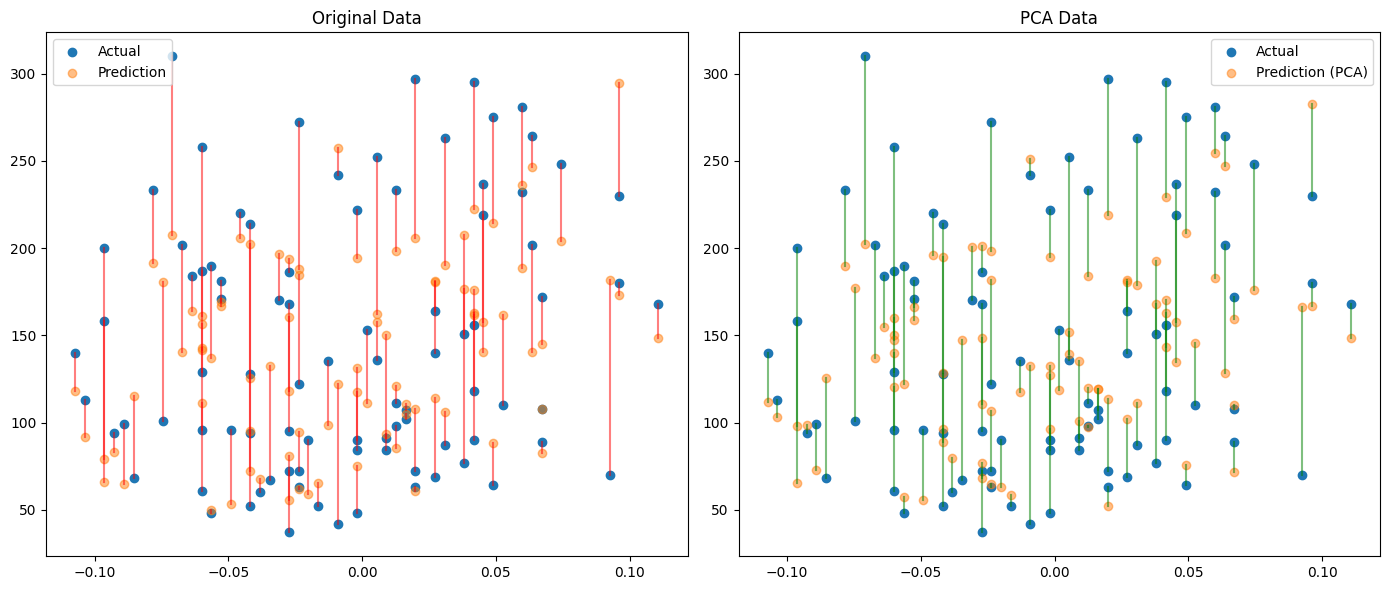

In [10]:
import matplotlib.pyplot as plt

# 원래 데이터 예측 결과
prediction_orig = model(X_test, W, b)

# PCA 데이터 예측 결과 (PCA 적용 후 W, b 사용)
prediction_pca = model(X_test_pca, W_pca, b_pca)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 원래 데이터 시각화
axs[0].scatter(X_test[:, 0], y_test, label='Actual')
axs[0].scatter(X_test[:, 0], prediction_orig, label='Prediction', alpha=0.5)
for i in range(len(y_test)):
    axs[0].plot([X_test[i, 0], X_test[i, 0]], [y_test[i], prediction_orig[i]], color='red', alpha=0.5)
axs[0].set_title('Original Data')
axs[0].legend()

# PCA 데이터 시각화
axs[1].scatter(X_test[:, 0], y_test, label='Actual')
axs[1].scatter(X_test[:, 0], prediction_pca, label='Prediction (PCA)', alpha=0.5)
for i in range(len(y_test)):
    axs[1].plot([X_test[i, 0], X_test[i, 0]], [y_test[i], prediction_pca[i]], color='green', alpha=0.5)
axs[1].set_title('PCA Data')
axs[1].legend()

plt.tight_layout()
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [11]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


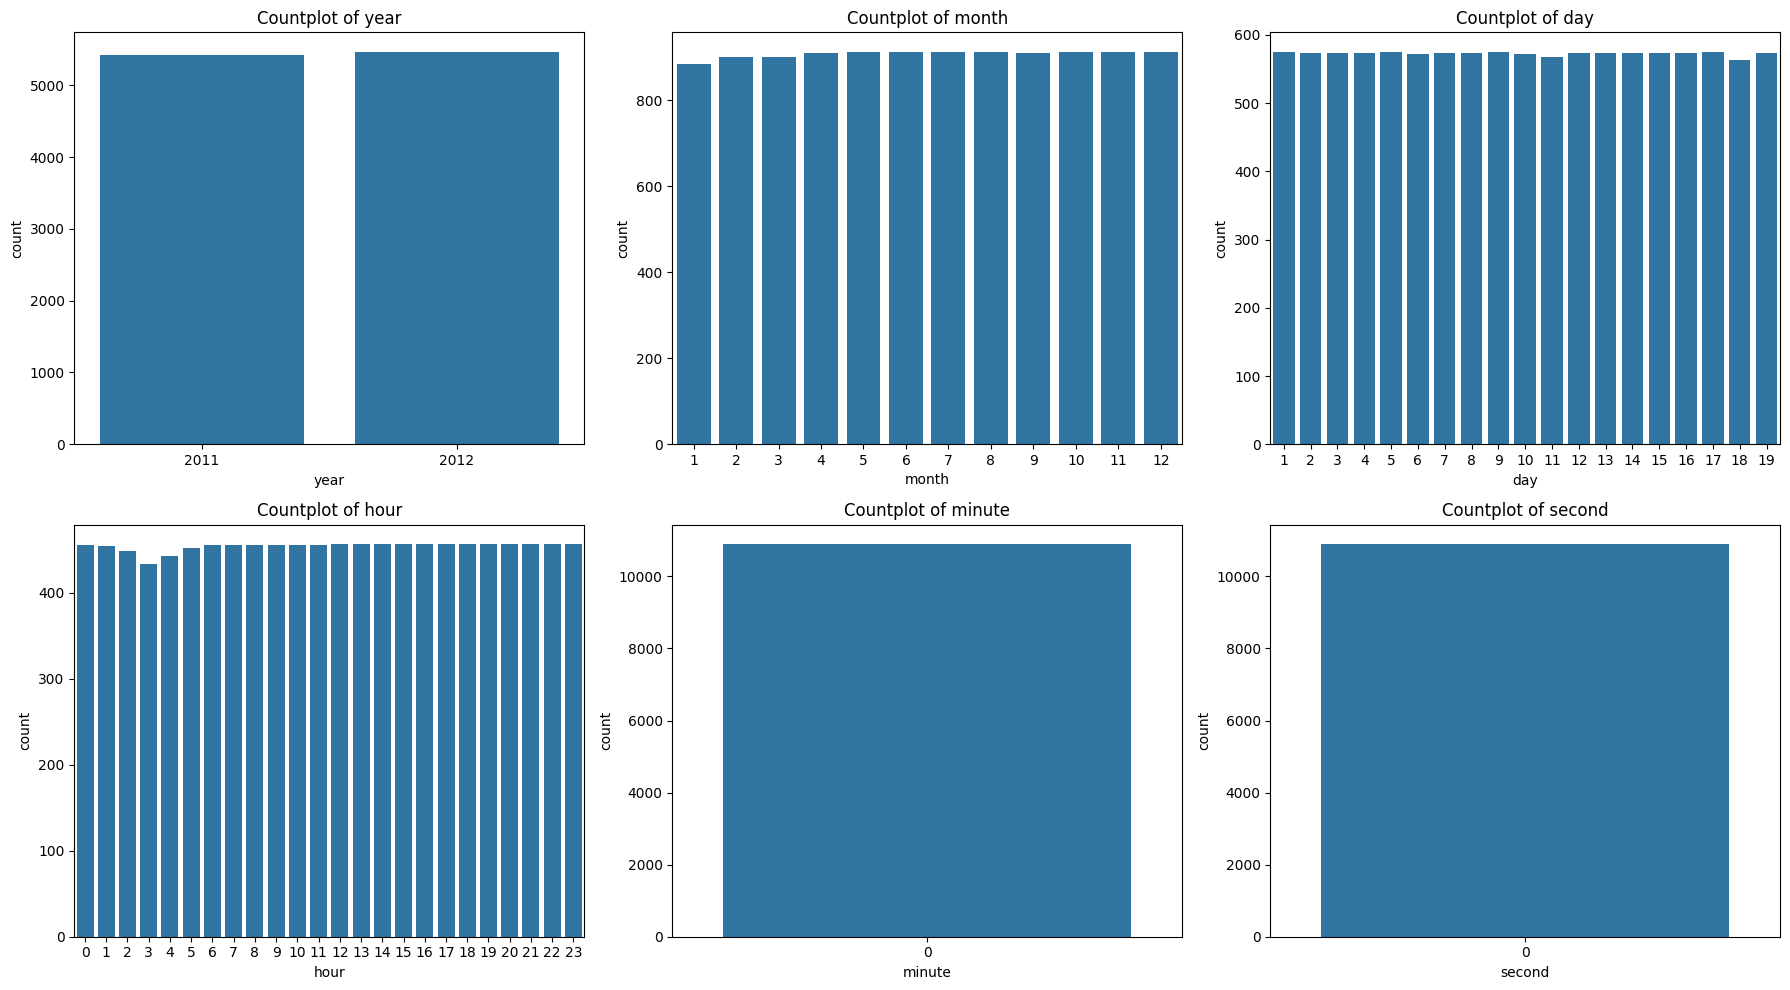

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

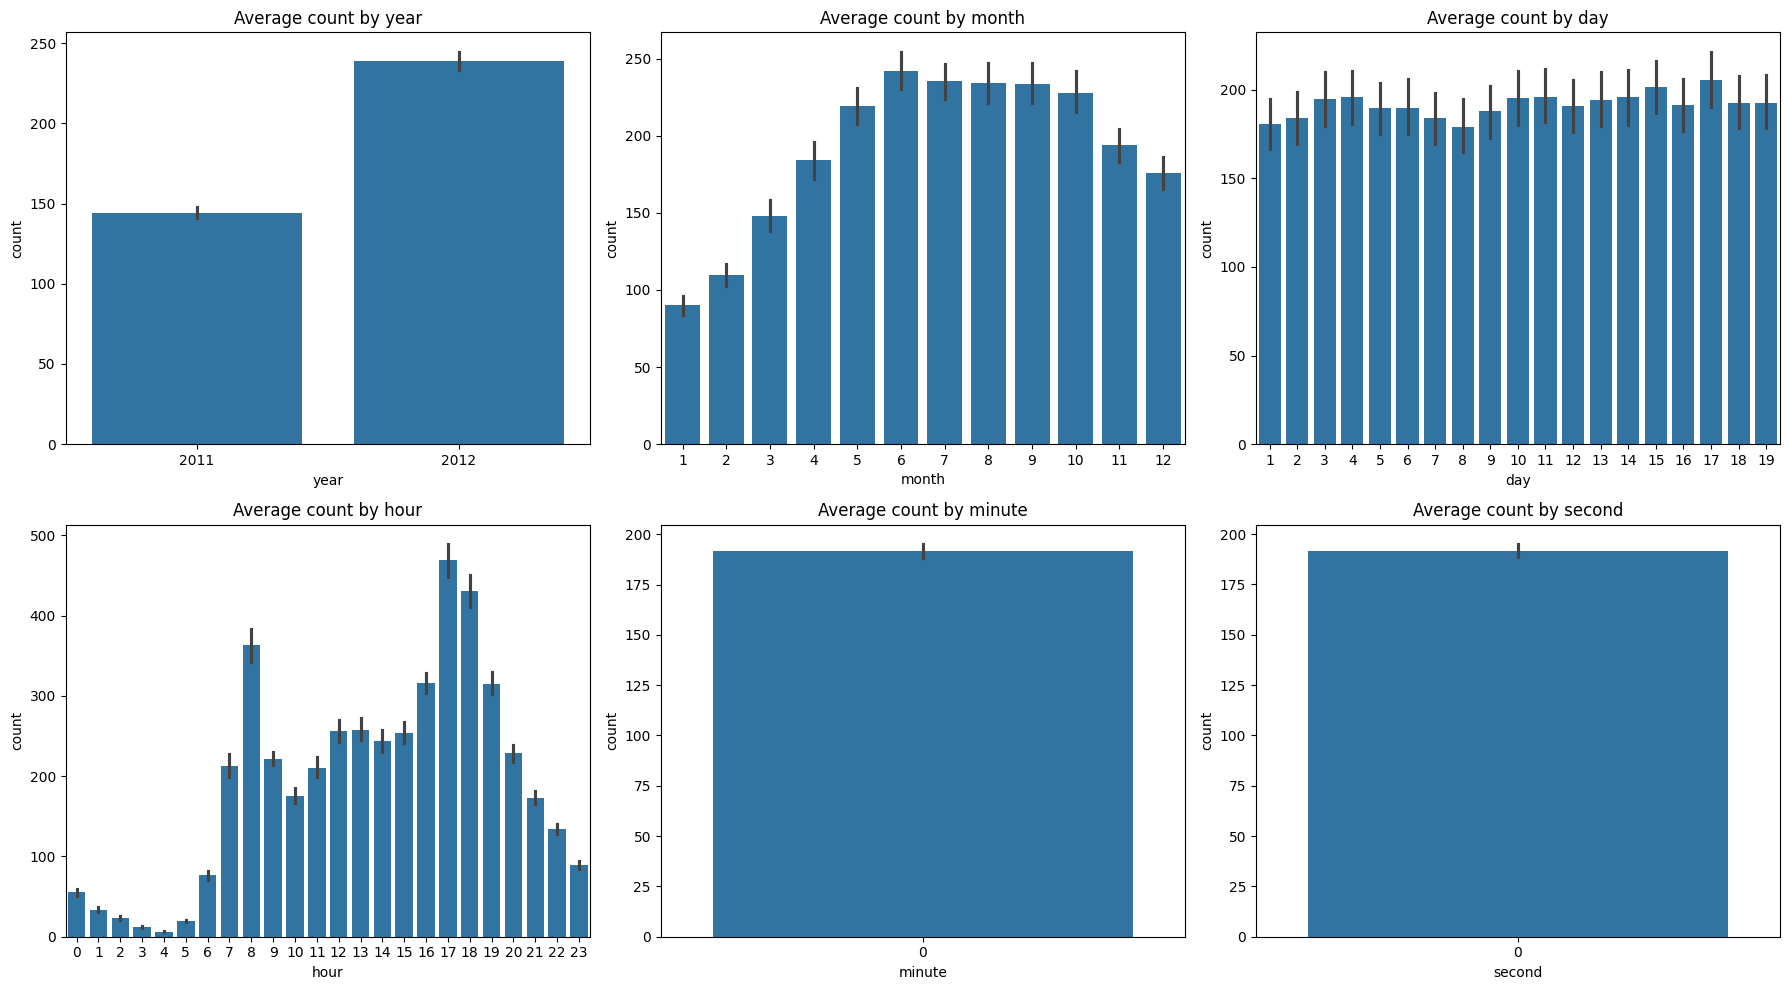

In [14]:
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for ax, col in zip(axs.flatten(), cols):
    sns.barplot(x=col, y='count', data=train, ax=ax)
    ax.set_title(f'Average count by {col}')

plt.tight_layout()
plt.show()

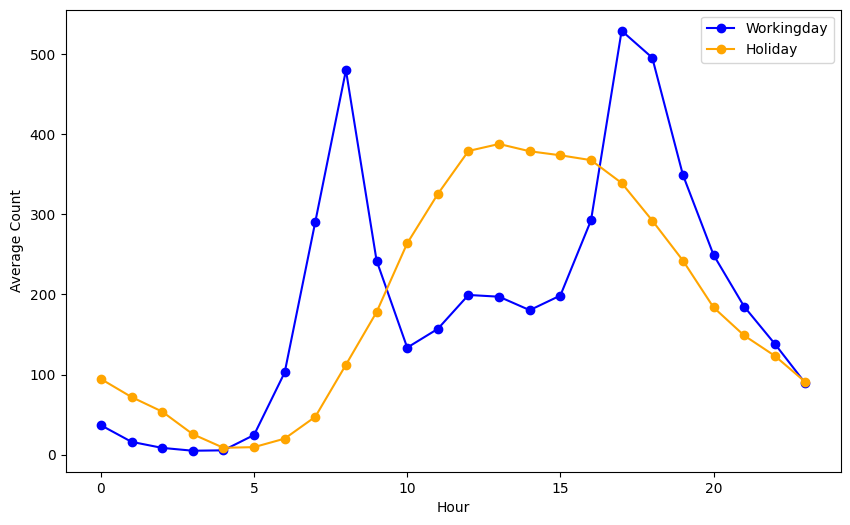

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

hourly = train.groupby(['hour', 'workingday'])['count'].mean().reset_index()

for wd, label, color in zip([1, 0], ['Workingday', 'Holiday'], ['blue', 'orange']):
    subset = hourly[hourly['workingday'] == wd]
    ax.plot(subset['hour'], subset['count'], label=label, color=color, marker='o')

ax.set_xlabel('Hour')
ax.set_ylabel('Average Count')
ax.legend()
plt.show()

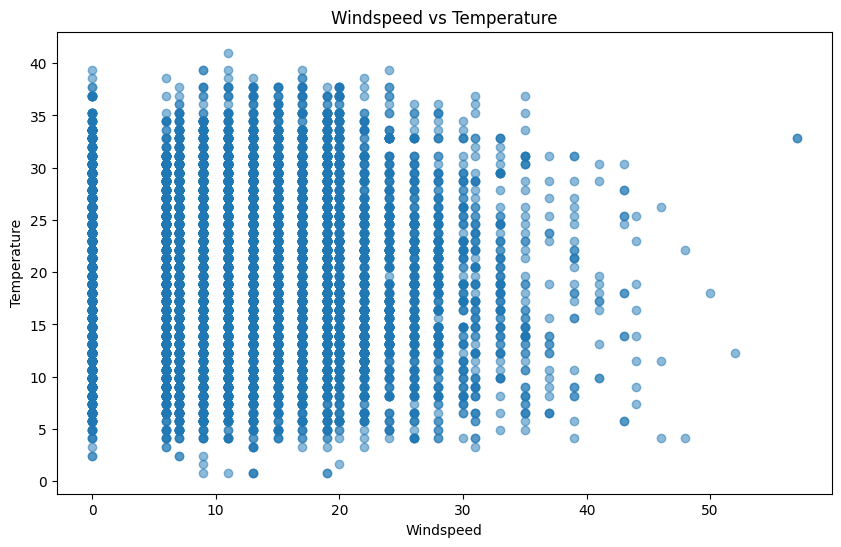

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(train['windspeed'], train['temp'], alpha=0.5)
plt.xlabel('Windspeed')
plt.ylabel('Temperature')
plt.title('Windspeed vs Temperature')
plt.show()

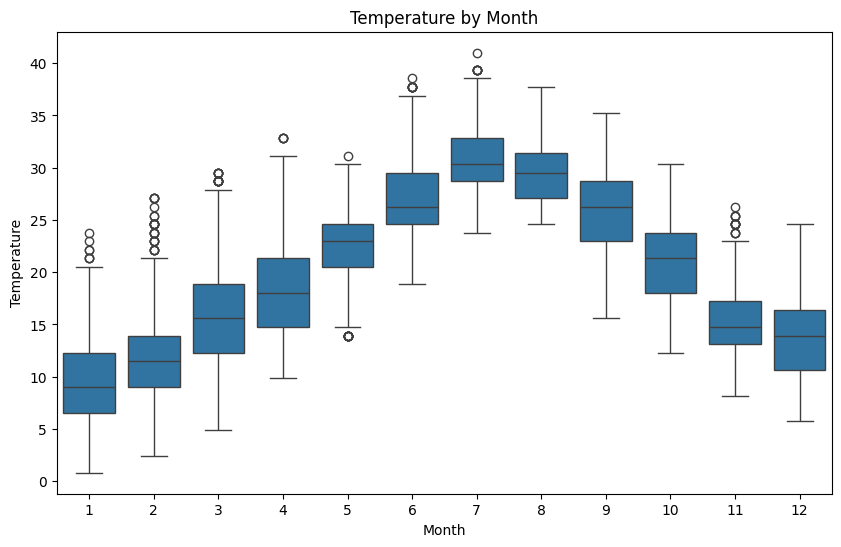

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='temp', data=train)
plt.title('Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [18]:
# 월(month) 기준으로 season 재정의
def get_season(month):
    if month in [3, 4, 5]:
        return 1  # 봄
    elif month in [6, 7, 8]:
        return 2  # 여름
    elif month in [9, 10, 11]:
        return 3  # 가을
    else:
        return 4  # 겨울

train['season'] = train['month'].apply(get_season)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [19]:
features = ['month', 'season', 'hour', 'workingday', 'holiday', 'temp', 'humidity']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 21681.68882431302
RMSE: 147.24703332941218


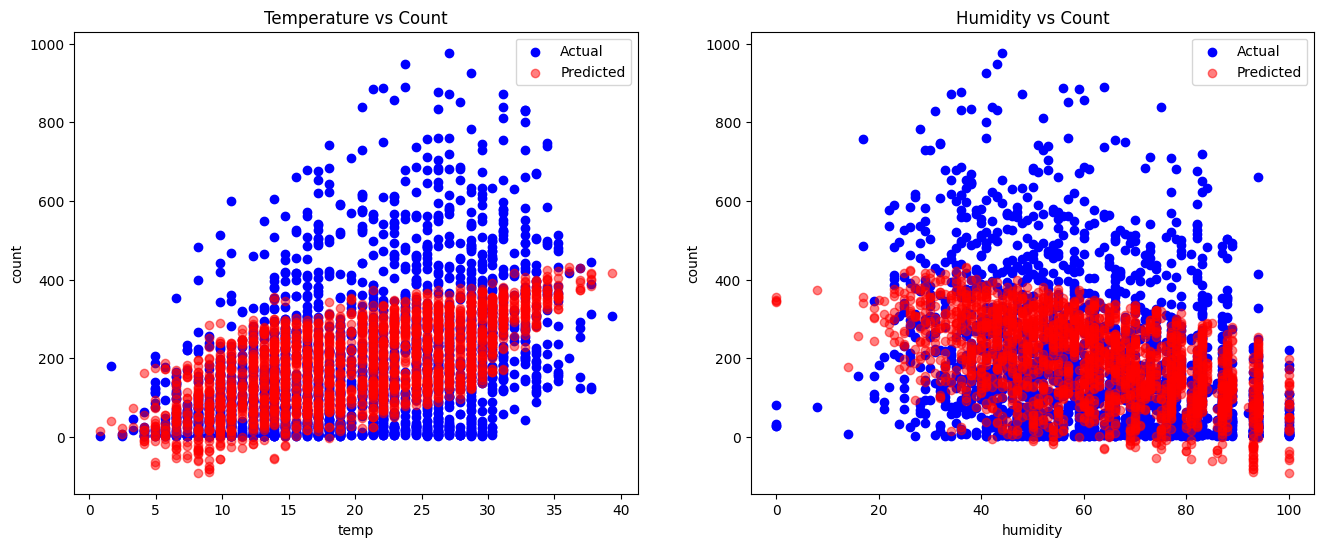

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()